In [1]:
import pymssql
conn=pymssql.connect(host=r'(local)', database='web',user='sa',password='1234',charset='utf8')

cursor=conn.cursor()
cursor.execute('select top 5 * from ontime')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('2008', '1', '3', '4', '2003', '1955', '2211', '2225', 'WN', '335', 'N712SW', '128', '150', '116', '-14', '8', 'IAD', 'TPA', '810', '4', '8', '0', '', '0', 'NA', 'NA', 'NA', 'NA', 'NA')
('2008', '1', '3', '4', '754', '735', '1002', '1000', 'WN', '3231', 'N772SW', '128', '145', '113', '2', '19', 'IAD', 'TPA', '810', '5', '10', '0', '', '0', 'NA', 'NA', 'NA', 'NA', 'NA')
('2008', '1', '3', '4', '628', '620', '804', '750', 'WN', '448', 'N428WN', '96', '90', '76', '14', '8', 'IND', 'BWI', '515', '3', '17', '0', '', '0', 'NA', 'NA', 'NA', 'NA', 'NA')
('2008', '1', '3', '4', '926', '930', '1054', '1100', 'WN', '1746', 'N612SW', '88', '90', '78', '-6', '-4', 'IND', 'BWI', '515', '3', '7', '0', '', '0', 'NA', 'NA', 'NA', 'NA', 'NA')
('2008', '1', '3', '4', '1829', '1755', '1959', '1925', 'WN', '3920', 'N464WN', '90', '90', '77', '34', '34', 'IND', 'BWI', '515', '3', '10', '0', '', '0', '2', '0', '0', '0', '32')


In [2]:
# 항공사별 출발 평균 지연 시간
import pymssql
conn=pymssql.connect(host=r'(local)', database='web',user='sa',password='1234',charset='utf8')

cursor=conn.cursor()
cursor.execute('select uniquecarrier, avg(cast(depdelay as int)) from ontime group by uniquecarrier')
rows=cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

B6	12
AA	12
UA	13
CO	13
HA	0
XE	11
YV	11
MQ	10
OH	11
9E	6
OO	7
DL	7
US	5
F9	5
AS	6
FL	9
NW	6
WN	10
EV	11
AQ	-1


In [3]:
# 항공사별 도착 평균 지연 시간
import pymssql
conn=pymssql.connect(host=r'(local)', database='web',user='sa',password='1234',charset='utf8')

cursor=conn.cursor()
cursor.execute('select uniquecarrier, avg(cast(arrdelay as int)) from ontime group by uniquecarrier')
rows=cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

B6	10
AA	12
UA	11
CO	10
HA	1
XE	10
YV	11
MQ	9
OH	11
9E	3
OO	6
DL	7
US	2
F9	6
AS	4
FL	8
NW	7
WN	5
EV	10
AQ	-2


In [4]:
# 2008년 도착 지연 횟수 월별 집계
import pymssql
conn=pymssql.connect(host=r'(local)', database='web',user='sa',password='1234',charset='utf8')

cursor=conn.cursor()
cursor.execute('select month,count(*) from ontime where arrdelay>0 group by month order by cast(month as int)')
rows=cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

1	279427
2	278902
3	294556
4	256142
5	254673
6	295897
7	264630
8	239737
9	169959
10	183582
11	181506
12	280493


In [5]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[279427, 278902, 294556, 256142, 254673, 295897, 264630, 239737, 169959, 183582, 181506, 280493]


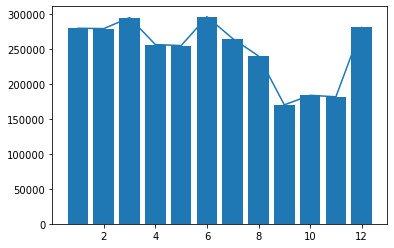

In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.bar(x,y)
plt.show()

In [9]:
# 요일별 지연 시간 합계
import pymssql
conn=pymssql.connect(host=r'(local)', database='web',user='sa',password='1234',charset='utf8')

cursor=conn.cursor()
cursor.execute('select dayofweek,sum(cast(arrdelay as int)) from ontime group by dayofweek order by dayofweek')
rows=cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

1	8320958
2	7526035
3	6632859
4	8512286
5	11050619
6	4872948
7	9079273


In [10]:
x=['월','화','수','목','금','토','일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[8320958, 7526035, 6632859, 8512286, 11050619, 4872948, 9079273]


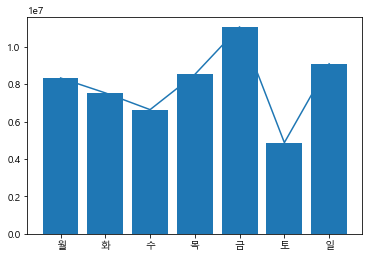

In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

plt.plot(x,y)
plt.bar(x,y)
plt.show()

In [13]:
# 시간대별 (10월, 월요일에 출발할 때 가장 좋은 시간대는?)
import pymssql
conn=pymssql.connect(host=r'(local)', database='web',user='sa',password='1234',charset='utf8')

cursor=conn.cursor()
cursor.execute('''select top 5 CRSDepTime,avg(cast(arrdelay as int)) arrdelay
from ontime where month=10 and dayofweek=1
group by CRSDepTime order by arrdelay''')
rows=cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

2202	-28
2216	-22
1807	-20
2154	-17
1948	-16
